# MBA FIAP Inteligência Artificial & Machine Learning

![Image of Dementia](img/ml.png)

## Programando IA com Python
## Projeto Final: Estimando Preços de Automóveis Utilizando Modelos de Regressão

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas. Por meio uma trilha guiada para construir um classificador que permitirá predizer o valor de um automóvel baseado em algumas características que cada grupo deverá escolher.

Este projeto poderá ser feita por grupos de até 4 pessoas.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------ | :---: |
| Edson Mosman             | RM 331282     | `1IA` |
| Giuliano Santos          | RM 330548     | `1IA` |
| Leonardo Carvalho        | RM 330208     | `1IA` |
| Ricardo Prates           | RM 330250     | `1IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos e, até mesmo, trechos de código-fonte.

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Exploração de Dados__
2. __Preparação de Dados__
3. __Desenvolvimento do Modelo__
4. __Treinamento e Teste do Modelo__
5. __Validação e Otimização do Modelo__
6. __Conclusões Finais__

## Exploração de Dados

Os dados que serão utilizados foram modificados para propocionar uma experiência que explore melhor as técnicas de processamento e preparação de dados aprendidas.

Originalmente os dados foram extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

**Implementação** 

Carregue o dataset "automobile-mod.csv" que se encontra na pasta "data" e faça uma inspeção nas 10 primeiras linhas para identificação básica dos atributos.

O dataset original "automobile.csv" se encontra na mesma pasta apenas como referência. Não deverá ser utilizado.

__Atualizado em 16/07/2017__

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
# Carregando o dataset 'automobile-mod.csv'
df = pd.read_csv('data/automobile-mod.csv', sep=';', header=0)

In [190]:
# Listando as 10 primeiras linhas do dataset
df.head(10)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875
9,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430


Relação das coluna e seu significado:

1. make: fabricante
2. fuel_type: tipo de combustível
3. aspiration: tipo de aspiração do motor, ex. turbo ou padrão (std)
4. body_style: estilo do carro, ex. sedan ou hatchback
5. drive_wheels: tração do carro, ex. rwd (tração traseira) ou frw (tração dianteira)
6. wheel_base: entre-eixos, distância entre o eixo dianteiro e o eixo traseiro
7. length: comprimento
8. width: largura
9. height: altura
10. curb_wheight: peso
11. engine_type: tipo do motor
12. number_of_cylinders: cilindrada, quantidade de cilindros
13. engine_size: tamanho do motor
14. fuel_system: sistema de injeção
15. bore: diâmetro do cilindro
16. stroke: diâmetro do pistão
17. compression_ratio: razão de compressão
18. horsepower: cavalo de força ou HP
19. peak_rpm: pico de RPM (rotações por minuto)
20. city_mpg: consumo em mpg (milhas por galão) na cidade
21. highway_mpg: consumo em mpg (milhas por galão) na estrada
22. price: preço (**Variável Alvo**)

In [165]:
# Nome das colunas
df.columns

Index(['make', 'fuel_type', 'aspiration', 'number_of_doors', 'body_style',
       'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_type', 'number_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [8]:
# O nome das colunas poderiam ser alterados de acordo com o seu significado (tradução)
#df.columns = ['fabricante','combustivel','tipo_aspiracao_motor','portas','estilo','tracao','localizacao_motor','entre-eixos','comprimento','largura','altura','peso','tipo_motor','cilindrada','tamanho_motor','sistema_injecao','diametro_cilindro','diametro_pistao','razao_compressao','hp','rpm','consumo_mpg_cidade','consumo_mpg_estrada','preco']

### Correlacionamento dos atributos

###### Resposta:
*Interpretação do grau de correlação (valores positivos ou negativos)*
* *0.00 a 0.19 - correção bem fraca*
* *0.20 a 0.39 - correção fraca*
* *0.40 a 0.69 - correção moderada*
* *0.70 a 0.89 - correção forte*
* *0.90 a 1.00 - correção muito forte*

In [166]:
# Verificando a correlação entre todas as colunas
df.corr()

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
wheel_base,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.495210,0.148239,0.250313,0.372607,-0.202727,-0.454390,-0.566392,0.584642
length,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.610324,0.116745,0.159733,0.577923,-0.056354,-0.633185,-0.709308,0.690628
width,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.545028,0.186352,0.189867,0.613488,-0.092631,-0.620316,-0.697742,0.751265
height,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.186701,-0.086508,0.259737,-0.085544,-0.275686,-0.069029,-0.117146,0.135486
curb_weight,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644871,0.162179,0.156433,0.757762,-0.098857,-0.714663,-0.800276,0.834415
engine_size,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.577265,0.184605,0.028889,0.821685,-0.104959,-0.619403,-0.671867,0.872335
bore,0.495210,0.610324,0.545028,0.186701,0.644871,0.577265,1.000000,-0.057887,0.001971,0.563921,-0.046081,-0.542294,-0.576674,0.543052
stroke,0.148239,0.116745,0.186352,-0.086508,0.162179,0.184605,-0.057887,1.000000,0.183855,0.092493,-0.065078,-0.079547,-0.071479,0.081434
compression_ratio,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,0.001971,0.183855,1.000000,-0.212984,-0.284202,0.270039,0.207436,0.071107
horsepower,0.372607,0.577923,0.613488,-0.085544,0.757762,0.821685,0.563921,0.092493,-0.212984,1.000000,0.132510,-0.763573,-0.776634,0.810795


Vamos utilizar algumas suposições e validar se elas são verdadeiras, por exemplo, o preço do carro pode variar com seu consumo, tamanho ou força? Vamos explorar estas hipósteses ou outras que o grupo julgue relevante.

###### RESPOSTA:
*Conforme tabela de correlação acima, podemos verificar que:*
* *<b>preço</b>: possui forte correlação entre <b>largura</b>, <b>peso</b>, <b>tamanho do motor</b>, <b>HP</b> e <b>consumo na estrada</b>.*
* *<b>diâmetro do pistão</b>, <b>razão de compressão</b> e <b>RPM</b>: são os atributos que possuem o menor grau de correlação, estando entre bem fraca e fraca.*

**Pergunta:** Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

**Resposta:**
*Infelizmente não entendemos o questionamento. Quais são os 3 cenários propostos?*

## Preparação dos Dados

### Identificação de Outliers Visualmente

Utilize visualizações gráficas para encontrar outliers em todos os atributos deste dataset.
Ainda não vamos remover ou atualizar os valores, por enquanto é uma análise exploratória.

Lembre-se que cada atributo possui um valor e dimensão diferente, portanto comparações devem estar em uma mesma base, por exemplo, __price__ não pode ser comparado com __width__ pois os eixos __y__ estarão sem proporção.

Text(0.5,1,'preço')

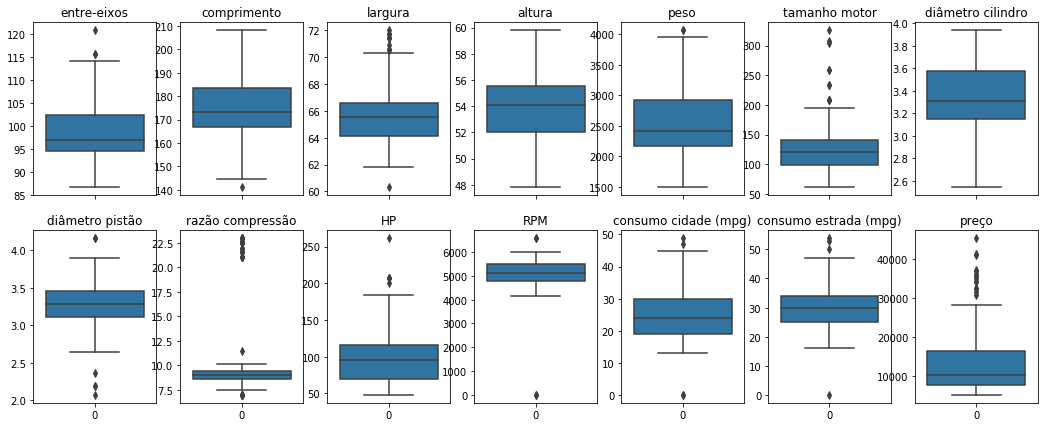

In [103]:
# Configurando área de plotagem para mostrar 7 gráficos em cada linha.
fig, axes = plt.subplots(2,7, figsize=(18, 7), sharex=True)

# Plotando gráficos Boxplot para analisar possíveis ouliers.
ax = sns.boxplot(data=[df['wheel_base']], ax=axes[0,0])
ax.set_title('entre-eixos')
ax = sns.boxplot(data=[df['length']], ax=axes[0,1])
ax.set_title('comprimento')
ax = sns.boxplot(data=[df['width']], ax=axes[0,2])
ax.set_title('largura')
ax = sns.boxplot(data=[df['height']], ax=axes[0,3])
ax.set_title('altura')
ax = sns.boxplot(data=[df['curb_weight']], ax=axes[0,4])
ax.set_title('peso')
x = sns.boxplot(data=[df['engine_size']], ax=axes[0,5])
x.set_title('tamanho motor')
x = sns.boxplot(data=[df['bore']], ax=axes[0,6])
x.set_title('diâmetro cilindro')
ax = sns.boxplot(data=[df['stroke']], ax=axes[1,0])
ax.set_title('diâmetro pistão')
ax = sns.boxplot(data=[df['compression_ratio']], ax=axes[1,1])
ax.set_title('razão compressão')
ax = sns.boxplot(data=[df['horsepower']], ax=axes[1,2])
ax.set_title('HP')
ax = sns.boxplot(data=[df['peak_rpm']], ax=axes[1,3])
ax.set_title('RPM')
ax = sns.boxplot(data=[df['city_mpg']], ax=axes[1,4])
ax.set_title('consumo cidade (mpg)')
ax = sns.boxplot(data=[df['highway_mpg']], ax=axes[1,5])
ax.set_title('consumo estrada (mpg)')
ax = sns.boxplot(data=[df['price']], ax=axes[1,6])
ax.set_title('preço')

Antes de explorar melhor as correlações, vamos analisar se há dados discrepante no conjunto de dados. Analisar os dados sem esta análise antes pode nos levar a algum viés indesejado.

### Análise de valores inválidos

Analise e busque por valores considerados nulos.

In [167]:
# Buscando possiveis valores nulos
df.isnull().any()

make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm                True
city_mpg                True
highway_mpg             True
price                  False
dtype: bool

###### RESPOSTA:
*Foram encontrados valores nulos nas propriedades <b>peak_rpm</b>, <b>city_mpg</b> e <b>highway_mpg</b>.*

Para os dados considerados nulos, realize a imputação de dados utilizando um valor apropriado (note que pode haver dados paramétricos e dados numéricos). Justique sua resposta.

In [3]:
#Pesquisando registros onde a propriedade peak_rpm é igual a null.
df.loc[df['peak_rpm'].isnull()]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
136,subaru,gas,std,two,hatchback,4wd,front,93.3,157.3,63.8,...,108,2bbl,3.62,2.64,8.7,73,NaN,26.0,31.0,7603
184,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,10.0,100,NaN,26.0,32.0,9995


In [4]:
#Calculando a média RPM para carros da marca subaru
mean = df.loc[(df['peak_rpm'].isnull() == False) & (df['make'] == 'subaru') & (df['engine_size'] == 108)]['peak_rpm'].mean()
#Aplicando a média calculada
df.loc[136,'peak_rpm'] = mean

In [5]:
#Calculando a média RPM para carros da marca volkswagen
mean = df.loc[(df['peak_rpm'].isnull() == False) & (df['make'] == 'volkswagen') & (df['engine_size'] == 109)]['peak_rpm'].mean()
#Aplicando a média calculada
df.loc[184,'peak_rpm'] = mean

In [6]:
#Validando operação
df.loc[df['peak_rpm'].isnull()]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [7]:
#Pesquisando registros onde a propriedade city_mpg é igual a null.
df.loc[df['city_mpg'].isnull()]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
36,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,...,110,1bbl,3.15,3.58,9.0,86,5800.0,NaN,33.0,7895


In [8]:
#Calculando a média do consumo na cidade
mean = df.loc[(df['city_mpg'].isnull() == False) & (df['make'] == 'honda') & (df['engine_size'] == 110)]['city_mpg'].mean()
#Aplicando a média calculada
df.loc[36,'city_mpg'] = mean

In [9]:
df.loc[df['city_mpg'].isnull()]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [10]:
#Validando operação
df.loc[df['highway_mpg'].isnull()]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,NaN,6529


In [11]:
#Calculando a média do consumo na estrada
mean = df.loc[(df['highway_mpg'].isnull() == False) & (df['make'] == 'honda') & (df['engine_size'] == 92)]['highway_mpg'].mean()
#Aplicando a média calculada
df.loc[32,'highway_mpg'] = mean

In [12]:
#Validando operação
df.loc[df['highway_mpg'].isnull()]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


###### RESPOSTA:
*Considerando que os valores RPM e de consumo estão diretamente relacionados à potência do carro, decidimos aplicar a média calculada apenas dentre os registros de iguais valores para <b>marca</b> (make) e <b>tamanho do motor</b> (engine_size).*

### Análise de valores com valores iguais a 0

Analise se no conjunto de dados há valores iguais a 0 e verifique se faz parte do contexto. Caso não faça parte do contexto, utilize alguma técnica de imputação de dados apropriada.

Inspecione o dataset por dados iguais a 0.

In [13]:
#Encontrando dados com valor zero (0).
df.isin([0]).sum()

make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               2
city_mpg               2
highway_mpg            1
price                  0
dtype: int64

A imputação de dados pode seguir algum padrão dos demais exemplos ou pode ser simplesmente atribuído um valor. Avalie tais condições de acordo com as inspeções de dados.

In [14]:
df.loc[(df['peak_rpm'].isin([0]))]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,38.8,6529
35,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,...,92,1bbl,2.92,3.41,9.2,76,0.0,30.0,34.0,7295


In [15]:
#Calculando a média RPM
mean = df.loc[(df['peak_rpm'].isin([0]) == False) & (df['make'] == 'honda') & (df['engine_size'] == 92)]['peak_rpm'].mean()
#Aplicando a média calculada
df.loc[32,'peak_rpm'] = mean
df.loc[35,'peak_rpm'] = mean

In [16]:
df.loc[(df['city_mpg'].isin([0]))]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
66,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,...,183,idi,3.58,3.64,21.5,123,4350.0,0.0,25.0,28176
181,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,9.0,85,5250.0,0.0,34.0,8195


In [17]:
#Calculando a média do consumo na cidade para carros da marca mercedes-benz
mean = df.loc[(df['city_mpg'].isin([0]) == False) & (df['make'] == 'mercedes-benz') & (df['engine_size'] == 183)]['city_mpg'].mean()
#Aplicando a média calculada
df.loc[66,'city_mpg'] = mean

In [18]:
#Calculando a média do consumo na cidade para carros da marca volkswagen
mean = df.loc[(df['city_mpg'].isin([0]) == False) & (df['make'] == 'volkswagen') & (df['engine_size'] == 109)]['city_mpg'].mean()
#Aplicando a média calculada
df.loc[181,'city_mpg'] = mean

In [19]:
df.loc[(df['highway_mpg'].isin([0]))]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
67,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,...,183,idi,3.58,3.64,21.5,123,4350.0,22.0,0.0,31600


In [20]:
#Calculando a média do consumo na estrada
mean = df.loc[(df['highway_mpg'].isin([0]) == False) & (df['make'] == 'mercedes-benz') & (df['engine_size'] == 183)]['highway_mpg'].mean()
#Aplicando a média calculada
df.loc[67,'highway_mpg'] = mean

###### RESPOSTA:
*Considerando que os valores RPM e de consumo estão diretamente relacionados à potência do carro, decidimos aplicar a média calculada apenas dentre os registros de iguais valores para <b>marca</b> (make) e <b>tamanho do motor</b> (engine_size).*

### Análise Numérica de Outliers

Da análise visual de outliers realizada acima vamos utilizar uma métrica de verificação mais apropriada e objetiva afim de criar um patamar aceitável de dados não discrepantes.

Neste projeto vamos considerar [o Método Turco para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/), que utiliza um __passo de limite__ que é 5 vezes (em nosso projeto) a diferença entre o terceiro (Q3) e o primeiro quartil (Q1). Deste modo, valores que sejam maiores que o Q3 + passo de limite ou menor Q2 - passo de limite sejam sinalizados como outliers.

Construa uma função que receba como parâmetro de entrada um série de dados e exiba os valores discrepantes. Utilize o boilerplate abaixo para completar as instruções faltantes.

*Dica: utilize a função do Numpy de percentil, np.percentile(serie, 25) para quartil 1 e np.percentile(serie, 75) para quartil 3.*

In [171]:
def identificacao_outlier(df, column_name): 
    
    print(column_name)
    
    #1o, 2o e 3o quartis
    Q1 = np.percentile(df[column_name],25)
    Q2 = np.percentile(df[column_name],50)
    Q3 = np.percentile(df[column_name],75)
    print ('Q1: ' + str(Q1) + ' Q2: ' + str(Q2) + ' Q3: ' + str(Q3))
    
    #5 vezes a diferença entre Q3 e Q1
    passoLimite = 5*(Q3 - Q1)
    print('Passo limite: ' + str(passoLimite))
    
    #Outliers
    outlier_upper = []
    outlier_lower = []
    for i, valor in df[column_name].items():
        #valores que sejam maiores que o Q3 + passo de limite
        if valor > (Q3 + passoLimite):
            outlier_upper.append(valor)
        #ou menor Q2 - passo de limite sejam sinalizados como outliers
        if valor < (Q2 - passoLimite):
            outlier_lower.append(valor)
    
    #Todos os outliers encontrados
    print('outlier lower: ' + ','.join(map(str,outlier_lower)))
    print('outlier upper: ' + ','.join(map(str,outlier_upper)))

In [172]:
identificacao_outlier(df,'wheel_base')

wheel_base
Q1: 94.5 Q2: 97.0 Q3: 102.4
Passo limite: 39.50000000000003
outlier lower: 
outlier upper: 


In [173]:
identificacao_outlier(df,'length')

length
Q1: 166.8 Q2: 173.2 Q3: 183.5
Passo limite: 83.49999999999994
outlier lower: 
outlier upper: 


In [174]:
identificacao_outlier(df,'width')

width
Q1: 64.1 Q2: 65.5 Q3: 66.6
Passo limite: 12.5
outlier lower: 
outlier upper: 


In [175]:
identificacao_outlier(df,'height')

height
Q1: 52.0 Q2: 54.1 Q3: 55.5
Passo limite: 17.5
outlier lower: 
outlier upper: 


In [176]:
identificacao_outlier(df,'curb_weight')

curb_weight
Q1: 2169.0 Q2: 2414.0 Q3: 2926.0
Passo limite: 3785.0
outlier lower: 
outlier upper: 


In [177]:
identificacao_outlier(df,'engine_size')

engine_size
Q1: 98.0 Q2: 120.0 Q3: 141.0
Passo limite: 215.0
outlier lower: 
outlier upper: 


In [178]:
identificacao_outlier(df,'bore')

bore
Q1: 3.15 Q2: 3.31 Q3: 3.58
Passo limite: 2.150000000000001
outlier lower: 
outlier upper: 


In [179]:
identificacao_outlier(df,'stroke')

stroke
Q1: 3.11 Q2: 3.29 Q3: 3.46
Passo limite: 1.7500000000000004
outlier lower: 
outlier upper: 


In [180]:
identificacao_outlier(df,'compression_ratio')

compression_ratio
Q1: 8.6 Q2: 9.0 Q3: 9.4
Passo limite: 4.0000000000000036
outlier lower: 
outlier upper: 22.7,22.0,21.5,21.5,21.5,21.5,21.9,21.0,21.0,21.0,21.0,21.0,22.5,22.5,22.5,23.0,23.0,23.0,23.0,23.0


In [181]:
identificacao_outlier(df,'horsepower')

horsepower
Q1: 70.0 Q2: 95.0 Q3: 116.0
Passo limite: 230.0
outlier lower: 
outlier upper: 


In [182]:
identificacao_outlier(df,'peak_rpm')

peak_rpm
Q1: 4800.0 Q2: 5200.0 Q3: 5500.0
Passo limite: 3500.0
outlier lower: 
outlier upper: 


In [183]:
identificacao_outlier(df,'city_mpg')

city_mpg
Q1: 19.0 Q2: 24.0 Q3: 30.0
Passo limite: 55.0
outlier lower: 
outlier upper: 


In [184]:
identificacao_outlier(df,'highway_mpg')

highway_mpg
Q1: 25.0 Q2: 30.0 Q3: 34.0
Passo limite: 45.0
outlier lower: 
outlier upper: 


In [185]:
identificacao_outlier(df,'price')

price
Q1: 7775.0 Q2: 10295.0 Q3: 16500.0
Passo limite: 43625.0
outlier lower: 
outlier upper: 


**Pergunta:** Houve dados discrepantes localizados pela metodologia sugerida? Qual foi a sua conclusão, são realmente dados que devem ser removidos ou mantidos? Justifique.

**Resposta:** *Sim, houve. Foram encontrados outliers superiores para o atributo <b>razão de compressão</b> (compression_ratio). A razão de compressão é diferente entre motores à gasolina e à diesel, sendo superiores para diesel, podendo chegar ao dobro do valor de um motor convencional à gasolina. Considerando que 90% dos registros deste dataset são dados de veículos com motores à gasolina, conforme pode ser visto na observação abaixo, podemos desconsiderar a coluna <b>compression_ratio</b> para futuras análises ou, caso seja uma informação importante para o estudo, devemos remover esses registros.*

In [197]:
df['fuel_type'].value_counts()

gas       181
diesel     20
Name: fuel_type, dtype: int64

In [215]:
print('Obs: Veículos à diesel representam',round(20/201*100, 2),'% do dataset.')

Obs: Veículos à diesel representam 9.95 % do dataset.


### Mapeamento de Dados Paramétricos

Os algoritmos de aprendizado de máquina precisam receber dados que sejam inteiramente numéricos. Dados que representam uma classificação como por exemplo um tipo de carro, como sedan ou hatchback, deve ser convertido em um valor numérico associado, como por exemplo 1 ou 2.

Crie uma função que receba uma lista única e retorne um dicionário com a categoria e um código numérico crescente e incremental para posteriormente utilizarmos como mapeamento.

In [233]:
#IMPLEMENTAÇÃO
#Metodo responsavel pelo mapeamento automatica de series parametricas
def mapear_serie(serie):
    values = serie.unique()
    dict_gen = { i+1 : item for i, item in enumerate(values) }
    return dict_gen

Com a funcão criada, crie dicionários para cada coluna paramétrica. Lembre-se que é necessário passar somente valores únicos.

*Dica: utilize a função unique() do dataframe para obter valores únicos de uma determinada série (ou coluna).*

In [234]:
# IMPLEMENTAÇÃO 
#Criando dicionarios para cada coluna parametrica
dict_make = mapear_serie(df['make'])
dict_fuel_type = mapear_serie(df['fuel_type'])
dict_aspiration = mapear_serie(df['aspiration'])
dict_doors = mapear_serie(df['number_of_doors'])
dict_body_style = mapear_serie(df['body_style'])
dict_drive_wheels = mapear_serie(df['drive_wheels'])
dict_engine_location = mapear_serie(df['engine_location'])
dict_fuel_system = mapear_serie(df['fuel_system'])

Até este momento seu conjunto de dados não deve conter nenhum dado paramétrico. Todos os dados armazenados com valores como texto, por exemplo, "diese", "gas" deve estar preenchido com valores numéricos, como 1 ou 2.

Inspecione seus dados e certifique de que tudo está certo.

*Dica: utilize uma inspeção simples visual, com 20 amostras.*

In [247]:
#IMPLEMENTAÇÃO
#Criando metodo para conversao dos dados parametricos
def converter_dado_parametrico(df, attribute, dictionary):
    for key, value in dictionary.items():
        df.loc[df[attribute] == value, attribute] = key

In [248]:
#Convertendo series inteiras de dados parametricos
converter_dado_parametrico(df,'make',dict_make)
converter_dado_parametrico(df,'fuel_type',dict_fuel_type)
converter_dado_parametrico(df,'aspiration',dict_aspiration)
converter_dado_parametrico(df,'number_of_doors',dict_doors)
converter_dado_parametrico(df,'body_style',dict_body_style)
converter_dado_parametrico(df,'drive_wheels',dict_drive_wheels)
converter_dado_parametrico(df,'engine_location',dict_engine_location)
converter_dado_parametrico(df,'fuel_system',dict_fuel_system)

In [272]:
#Realizando uma inspecao visual com 20 amostras, selecionando o 1o registro a cada 10.
df.iloc[1::10]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
1,1,1,1,1,1,1,1,88.6,168.8,64.1,...,130,1,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
11,3,1,1,1,3,1,1,101.2,176.8,64.8,...,164,1,3.31,3.19,9.0,121,4250.0,21.0,28.0,20970
21,5,1,1,1,2,2,1,93.7,157.3,63.8,...,90,2,2.97,3.23,9.4,68,5500.0,31.0,38.0,6377
31,6,1,1,1,2,2,1,93.7,150.0,64.0,...,79,4,2.91,3.07,10.1,60,5500.0,38.0,42.0,5399
41,6,1,1,1,3,2,1,96.5,169.1,66.0,...,110,2,3.15,3.58,9.1,100,5500.0,25.0,31.0,10345
51,9,1,1,2,3,2,1,93.1,166.8,64.2,...,91,2,3.08,3.15,9.0,68,5000.0,31.0,38.0,7395
61,9,1,1,2,2,2,1,98.8,177.8,66.5,...,122,2,3.39,3.39,8.6,84,4800.0,26.0,32.0,11245
71,10,1,1,1,5,1,1,112.0,199.2,72.0,...,304,1,3.80,3.35,8.0,184,4500.0,14.0,16.0,45400
81,12,1,2,1,2,2,1,95.9,173.2,66.3,...,156,8,3.59,3.86,7.0,145,5000.0,19.0,24.0,14489
91,13,1,1,1,3,2,1,94.5,165.3,63.8,...,97,2,3.15,3.29,9.4,69,5200.0,31.0,37.0,7299


## Desenvolvimento do Modelo

O conjunto de dados que temos a nossa disposição indica a aplicação de um modelo voltado a regressão, ou seja, queremos prever um preço de um veículo dada certas condições. É um problema típico de predição de série numérica.

Podemos aplicar quaisquer algoritmos de regressão existente que tenha aplicação de classificação, pois é de um domínio diferente.

Iremos explorar 3 modelos de algoritmos de regressão para testar a performance de cada um deles. Ao final será eleito o que apresentar melhor performance de pontuação R2.

Os algoritmos são:

1. [Regressão Linear](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
2. [Regressão de Árvore de Decisão](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
3. [Regressão Ridge](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

**Pergunta:** Explique como cada modelo de regressão funciona, indicando pelo menos um caso de uso em cada um deles.

**Resposta:**

Antes de partimos para o treinamento do modelo, precisaremos separar os dados em subconjuntos para permitir avaliar adequadamente o modelo.

Uma boa razão de tamanho de conjunto de treinamento e testes é 80% e 20% ou ainda, 70% e 30%. O importante é não misturar dados de treinamento com os de teste para termos uma ideia melhor sobre a performance do modelo com dados previametne não treinados.

Antes de separarmos os dados, a partir das análises realizadas anteriormente, quais seriam os atributos a serem utilizados e qual seria o atributo preditor?

In [1]:
#IMPLEMENTAÇÃO



Crie subsets de treinamento e teste utilizado uma razão adequada de tamanho.
Utilze o ```train_test_split``` passando como parâmetros

In [2]:
from sklearn.model_selection import train_test_split

#IMPLEMENTAÇÃO



Inspecione cada subconjunto de dados obtidos do ```train_test_split```. Note que nos conjuntos X devemos ter atributos, logo é esperado uma matriz com mais de uma coluna. Nos conjuntos y, é a classe de predição, logo é esperado apenas um atributo.

In [3]:
#IMPLEMENTAÇÃO
#Inspeção de X_train



In [4]:
#IMPLEMENTAÇÃO
#Inspeção de Y_train



Verifique também se a razão dos conjuntos está coerente com a divisão estabelecida. Para estes cálculos divia o número de itens do conjunto de treino pelo total e também o de testes pelo total.

In [5]:
#IMPLEMENTAÇÃO



## Treinamento e teste do modelo

Após separarmos os dados adequadamente, selecionar os atributos que irão compor como o modelo deve treinar e qual atributo deve perseguir, o próximo passo é treinar este modelo e verificar, pelos testes, sua performance.

Este estudo também irá levar a escolhermos qual algoritmo devemos utilizar dentre os três selecionados neste ajuste.

Para avaliarmos a performance dos modelos, vamos criar uma função que determinará a pontuação R2.

Não esqueça de avaliar os conjuntos de dados de treino (```X_train```, ```y_train``` e de teste, ```X_test``` e ```y_test```)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

def pontuacao(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print("%s R2 score: %.2f" %(modelo,r2_score(y_test, y_pred)))

### Regressão Linear

Utilize para a variável preditora a função ```.ravel()``` para converter os dados no formato que o ```sklearn``` espera.

In [18]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression()

#IMPLEMENTAÇÃO



Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [10]:
#IMPLEMENTAÇÃO



### Regressão de árvore de Decisão

In [17]:
from sklearn import tree

dtr_model = tree.DecisionTreeRegressor()

#IMPLEMENTAÇÃO



Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [13]:
#IMPLEMENTAÇÃO



### Regressão Ridge

In [16]:
lrr_model = linear_model.Ridge()

#IMPLEMENTAÇÃO



Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [19]:
#IMPLEMENTAÇÃO



**Pergunta:** Nesta análise preliminar, como foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:**

## Validação e Otimização do Modelo

Cada algoritmo de modelo pode oferecer a possibilidade de ajustes de seus parâmetros. Tais ajustes podem contribuir para melhorar ou piorar o modelo, portanto esta fase de otimização e validação é importante entender o patamar de partida, com os valores padrões obtidos nos passos anteriores versus as otimizações.

É comum que as otimizações não sejam capazes de alterar os patamares padrão.

O Scikit Learn oferece uma forma simplificada de testar diversas condições de parâmetros diferentes por meio do ```GridSearchCV```. Após diversos testes é apresentado os parâmetros que obtiveram os melhores resultados.

### Regulação dos parâmetros dos modelos

Analise os parâmetros possíveis de cada algortimo de regressão e crie um dicionário para ser utilizado no ```GridSearchCV```.
O dicionário é composto pelo nome do parâmetro como chave. Seu valor será uma lista de valores que se deseja otimizar. Não deixe de revisar a [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Verfique a pontuação R2 para os conjuntos de dados de treino e de teste, pois nem sempre preditores que se saem bem durante o treinamento terão a mesma performance com os dados de teste.

### Regulação do Modelo de Regressão Linear

Escolha quais atributos incluir na variável ```parameters```para serem otimizados. Essa variável é um dicionário onde cada chave representa uma configuração do modelo, o valor pode ser único ou uma lista, neste caso utilize ```[]``` para incluir múltiplos valores. Como nosso problema é relacionado a regressão, utilize a pontuação R2 em ```scoring``` na configuração do ```GridSearchCV```. 

In [ ]:
from sklearn.model_selection import GridSearchCV
        
parameters = {}
opt_model_lr = GridSearchCV(lr_model, parameters, scoring='r2')
opt_model_lr.fit(X_train, y_train.ravel())

Calcule as pontuações para o melhor estimador com dados de treino.

In [ ]:
opt_model_lr.score(X_train, y_train.ravel()), opt_model_lr.best_estimator_

E também para os dados de testes.

In [ ]:
opt_model_lr.score(X_test, y_test.ravel()), opt_model_lr.best_estimator_

### Regulação do Modelo de Regressão de Árvore de Decisão

In [ ]:
parameters = {}
opt_model_dtr = GridSearchCV(dtr_model, parameters, scoring='r2')
opt_model_dtr.fit(X_train, y_train.ravel())

Pontuação dos dados de treino.

In [21]:
#IMPLEMENTAÇÃO



Pontuação dos dados de teste.

In [22]:
# IMPLEMENTAÇÃO



### Regulação do Modelo de Regressão Ridge

In [ ]:
parameters = {}

opt_model_lrr = GridSearchCV(lrr_model, parameters, scoring='r2')
opt_model_lrr.fit(X_train, y_train.ravel())

Pontuação dos dados de treino.

In [ ]:
#IMPLEMENTAÇÃO



Pontuação dos dados de teste.

In [24]:
#IMPLEMENTAÇÃO



Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes

|                     | Regressão linear | Regressão árvore de decisão | Regressão ridge |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| R2 treino |      X           |      X                       |   X              |
| R2 teste  |      X            |      X                       |   X              |


**Pergunta:** Qual dos algoritmos de regressão obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:**

### Implementação do algoritmo otimizado

Configure o classificador selecionado com os parâmetros otimizados obtidos anteriormente.

In [26]:
#IMPLEMENTAÇÃO



### Teste com exemplos

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Escolha caracaterísticas que demonstrem como o regressor deveria se comportar. Para tanto, imagine exemplos dos quais você espera um valor baixo, mediano e alto do preço do veículo baseado nos atributos escolhidos

In [ ]:
#Lembre-se que os atributos são os armazenados na lista feature_col_names

feature_col_names

In [29]:
#IMPLEMENTAÇÃO
#A entrada de dados deve ser uma matriz do seguinte formato, note que há dois colchetes pois é uma 
#matriz dentro de outra matriz [[a,b,c,d,e]]

test_example_1 = [[]]
test_example_2 = [[]]
test_example_3 = [[]]


## Conclusões finais

Este projeto apresentou de forma simplifcada o __Worflow de Machine Learning__ que pode servir como base para estudos relacionados a classificação ou predição de séries numéricas.

A fase de preparação, evidenciada no projeto, é uma das mais importantes da qual se precisa investir um bom tempo para dar os dados organizados e confiáveis, pois é a forma como os classificadores irão aprender com os exemplos e tentarão desvencilhar de efeitos indesejáveis como os vieses.

Regressores são um tipo de algoritmo de machine learning que pode ser aplicado em diversas áreas das quais é necessário predizer um número baseado em um conjunto de dados numéricos ou série numérica, logo sua aplicação é bem ampla.

**Pergunta:** Seu modelo conseguiu prever adequadamente novos dados a partir do treinamento dos dados de teste? O que você faria diferente?

**Resposta:**

**Pergunta:**: Em que outras áreas você poderia aplicar estes tipos de algoritmos de regressão de aprendizado de máquina?

**Resposta**: